In [1]:
%matplotlib inline

In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import yellowbrick as yb 
import matplotlib.pyplot as plt 

# Using Yellowbrick to Explore Book Reviews 

This notebook is for the Yellowbrick user study.

About the data:
[Amazon book reviews Data Set](http://archive.ics.uci.edu/ml/datasets/Amazon+book+reviews) 

Abstract: 
213,335 book reviews for 8 different books. 

Source:
Ahmet Taspinar, info '@' ataspinar.com, http://ataspinar.com

Data Set Information:
 - Gone Girl: 41,974 
 - The Girl on the Train: 37,139 
 - The Fault in our Stars: 35,844 
 - Fifty Shades of Grey: 32,977 
 - Unbroken: 25,876 
 - The hunger games: 24,027 
 - The Goldfinch: 22,861 
 - The Martian: 22,571 

Attribute Information:
Each entry is separated by a newline character. Each entry contains four attributes, which are separated by a space: 
1. review score 
2. tail of review url
3. review title 
4. HTML of review text

After [downloading the data](http://archive.ics.uci.edu/ml/machine-learning-databases/00370/amazon_book_reviews.rar) in .rar archive form, I unpacked it with `unrar`:

_(if you don't have unrar)_

    $ brew install unrar  # or use apt-get or yum, depending on your system
    $ urar e amazon_book_reviews.rar

The result is the following 8 csv files and a metadata.txt file:

 - Andy-Weir-The-Martian.csv
 - Laura-Hillenbrand-Unbroken.csv
 - Donna-Tartt-The-Goldfinch.csv
 - Paula_Hawkins-The-Girl-On-The-Train.csv
 - EL-James-Fifty-Shades-of-Grey.csv
 - Suzanne-Collins-The-Hunger-Games.csv
 - Fillian_Flynn-Gone_Girl.csv	
 - John-Green-The-Fault-in-our-Stars.csv
 - metadata.txt

In [3]:
from sklearn.datasets.base import Bunch


## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")


## Dataset loading mechanisms
datasets = {
    "reviews": os.path.join(FIXTURES, "reviews")
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in text corpus by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]

    # Read the files in the directory as the categories. 
    categories = [
        os.path.splitext(f)[0] for f in os.listdir(path) 
        if os.path.isfile(os.path.join(path, f))
        and os.path.join(path, f).endswith(".csv")
    ]    
    
    files  = [] # holds the file names relative to the root 
    data   = [] # holds the text read from the file 
    target = [] # holds the string of the category 
        
    # Load the data from the files in the corpus 
    for cat in categories:
        files.append(os.path.join(path, cat + '.csv'))

        with open(os.path.join(path, cat + '.csv'), 'r') as f:
            content = f.read()
            docs = [s.strip() for s in content.splitlines()]
            for doc in docs[:1000]:  # limited size so nb won't crash
                data.append(doc)
                target.append(cat)
        
    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

In [4]:
corpus = load_data('reviews')

### Visualizing Stopwords Removal

How much does stopwords removal impact a corpus of book reviews?

To visualize the transformation, we can compare the results before and after stopwords have been removed from the corpus using the Yellowbrick `FreqDistVisualizer`:

In [5]:
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


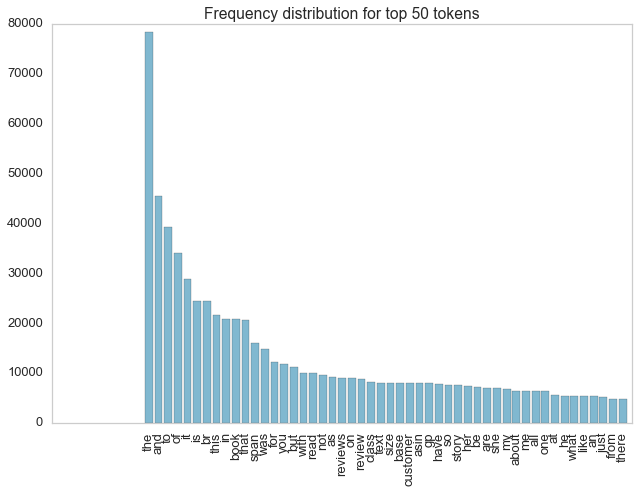

In [6]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer()
visualizer.fit(docs, features)
visualizer.poof()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


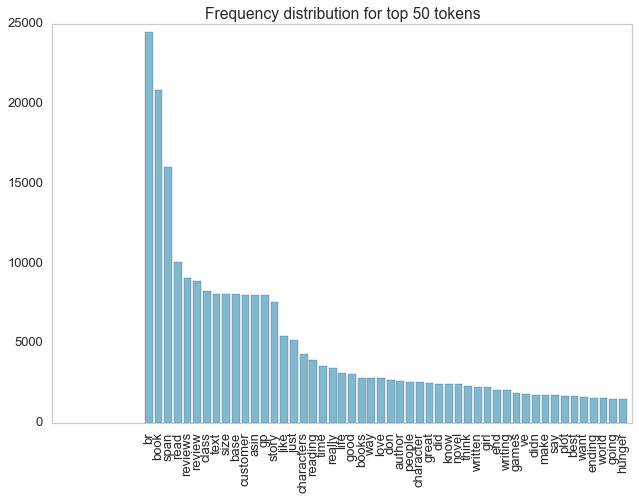

In [7]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer()
visualizer.fit(docs, features)
visualizer.poof()

### Visualizing tokens across corpora

It is also interesting to explore the differences in tokens across a corpus. For example, do people say different things in reviews about books by men vs. books by women?

In [8]:
male   = ['Andy-Weir-The-Martian',
          'John-Green-The-Fault-in-our-Stars']

female = ['Laura-Hillenbrand-Unbroken',
          'Paula_Hawkins-The-Girl-On-The-Train',
          'Suzanne-Collins-The-Hunger-Games',
          'Donna-Tartt-The-Goldfinch',
          'EL-James-Fifty-Shades-of-Grey',
          'Fillian_Flynn-Gone_Girl']

male_author_reviews   = []
female_author_reviews = []

for book in male:
    for idx in range(len(corpus.data)):
        if corpus.target[idx] == book:
            male_author_reviews.append(corpus.data[idx])

for book in female:
    for idx in range(len(corpus.data)):
        if corpus.target[idx] == book:
            female_author_reviews.append(corpus.data[idx])    

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


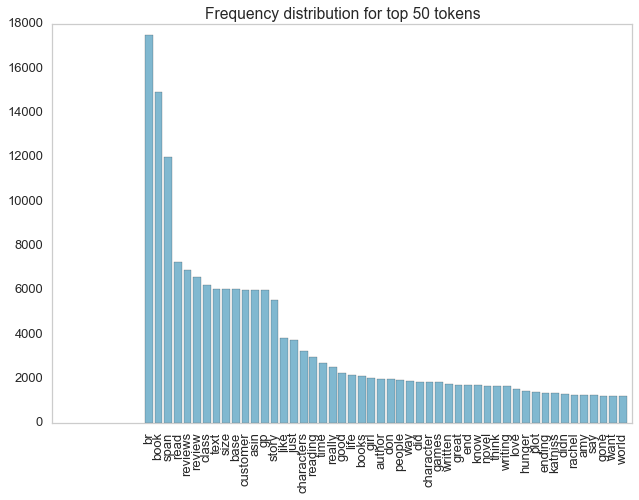

In [9]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in female_author_reviews)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer()
visualizer.fit(docs, features)
visualizer.poof()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


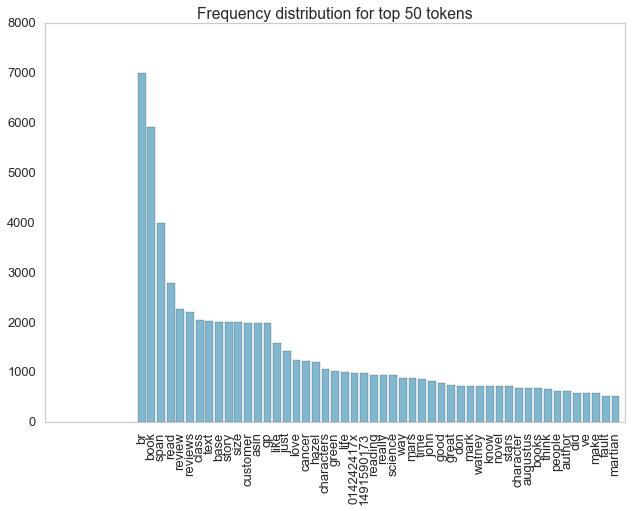

In [11]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in male_author_reviews)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer()
visualizer.fit(docs, features)
visualizer.poof()

## t-SNE: Corpus Visualization 

What patterns can we see if we project the book reviews into 2 dimensional space? 

In [12]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()

docs   = tfidf.fit_transform(corpus.data)
labels = corpus.target

KeyError: 'Paula_Hawkins-The-Girl-On-The-Train'

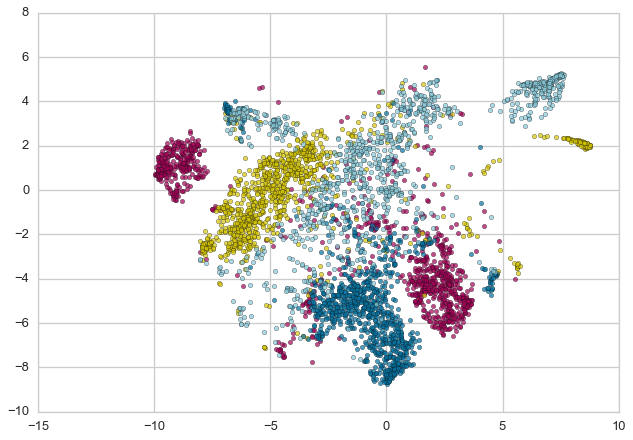

In [13]:
# Create the visualizer and draw the vectors 
tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

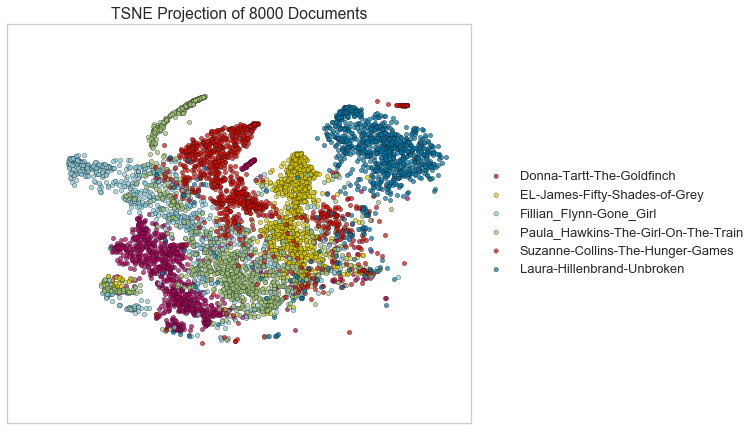

In [14]:
# Only visualize the books by female authors
tsne = TSNEVisualizer(classes=female)
tsne.fit(docs, labels)
tsne.poof()

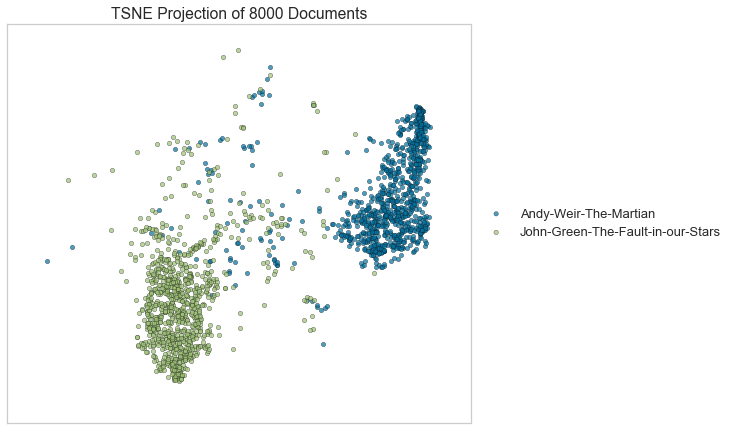

In [15]:
# Only visualize the books by male authors
tsne = TSNEVisualizer(classes=male)
tsne.fit(docs, labels)
tsne.poof()